#多変量解析
圓川隆夫「多変量のデータ解析」(1988, 朝倉書店)をもとに多変量解析の演習を行います。

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##重回帰分析
以下のように変数を設定する。
\begin{equation}
y = 
\begin{bmatrix}
y_{1} \\
y_{2} \\
\vdots \\
y_{n}
\end{bmatrix}
, 
X =
\begin{bmatrix}
x_{11} & \cdots & x_{1i} & \cdots & x_{1k}\\
\vdots & \ddots & & & \vdots \\
x_{i1} & & x_{ii} & & x_{ik} \\
\vdots & & & \ddots & \vdots \\
x_{n1} & \cdots & x_{ni} & \cdots & x_{nk}
\end{bmatrix}
,
\beta = 
\begin{bmatrix}
\beta_{1} \\
\vdots \\
\beta_{n}
\end{bmatrix}
,
\epsilon = 
\begin{bmatrix}
\epsilon_{1} \\
\vdots \\
\epsilon_{n}
\end{bmatrix}
\end{equation}

このとき、最小自乗法により
$\hat \beta = (X'X)^{-1}X'y$となる。  

まず教科書p.28の表2.2を読み込む。

In [2]:
data = pd.read_csv("tab22.csv") # http://shimotsu.web.fc2.com/Site/duo_bian_liang_jie_xi.html
data

,y,x1,x2,x3
0,30.4,14.5,87.6,7.5
1,26.5,17.1,89.3,6.9
2,29.2,16.5,92.3,7.2
3,29.5,15.5,89.2,7.4
4,25.9,16.6,87.0,6.5
5,29.6,18.8,91.6,8.2
6,26.2,19.1,90.0,7.3
7,28.1,17.5,91.5,7.8
8,31.1,14.6,89.7,7.0
9,26.9,16.1,90.5,6.7


最初に収益データ(y)に圧力(x1)を説明変数として単回帰モデルをあてはめる。

In [3]:
y = np.asarray(data["y"])
X = np.c_[np.ones(len(data)), np.asarray(data[' x1'])]
beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
e = y - X.dot(beta)
R2 = 1 - e.dot(e.T)/sum((y - np.mean(y))**2)
print('y = ' + str(y))
print('X = \n' + str(X))
print('b = \n' + str(beta))
print('R2 = \n' + str(R2))

y = [ 30.4  26.5  29.2  29.5  25.9  29.6  26.2  28.1  31.1  26.9]
X = 
[[  1.   14.5]
 [  1.   17.1]
 [  1.   16.5]
 [  1.   15.5]
 [  1.   16.6]
 [  1.   18.8]
 [  1.   19.1]
 [  1.   17.5]
 [  1.   14.6]
 [  1.   16.1]]
b = 
[ 39.06518323  -0.64492984]
R2 = 
0.289997897144


故に、
$\hat y_{i} = 39.1 - 0.645 x_{1i}$
が得られ、寄与率は$R^{2} = 0.29$である。

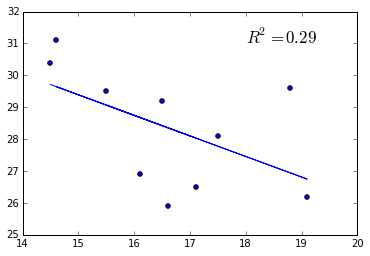

In [4]:
plt.scatter(data[' x1'], data['y'])
plt.plot(data[' x1'], X.dot(beta))
plt.text(18, 31,"$R^{2}=%s$" % round(R2, 3), fontsize=17)

同様にして、温度(x2)を説明変数とした場合は、

In [5]:
y = np.asarray(data["y"])
X = np.c_[np.ones(len(data)), np.asarray(data[' x2'])]
beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
e = y - X.dot(beta)
R2 = 1 - e.dot(e.T)/sum((y - np.mean(y))**2)
print('y = ' + str(y))
print('X = \n' + str(X))
print('b = \n' + str(beta))
print('R2 = \n' + str(R2))

y = [ 30.4  26.5  29.2  29.5  25.9  29.6  26.2  28.1  31.1  26.9]
X = 
[[  1.   87.6]
 [  1.   89.3]
 [  1.   92.3]
 [  1.   89.2]
 [  1.   87. ]
 [  1.   91.6]
 [  1.   90. ]
 [  1.   91.5]
 [  1.   89.7]
 [  1.   90.5]]
b = 
[ 11.77514621   0.18432017]
R2 = 
0.0281405732572


故に、
$\hat y_{i} = 11.8 +0.184x_{2i}$が得られ、寄与率は$R^{2} = 0.028$である。

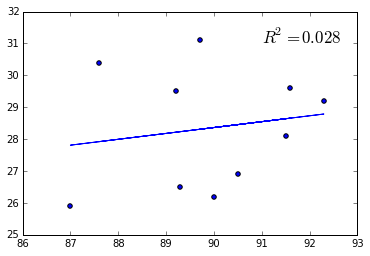

In [6]:
plt.scatter(data[' x2'], data['y'])
plt.plot(data[' x2'], X.dot(beta))
plt.text(91, 31,"$R^{2}=%s$" % round(R2, 3), fontsize=17)

収率データ(y)に圧力(x1)、温度(x2)、酸度(x3)の3個の説明変数で重回帰分析を行う。

In [7]:
y = np.asarray(data["y"])
X = np.c_[np.ones(len(data)), np.asarray(data[[' x1', ' x2', ' x3']])]
beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
e = y - X.dot(beta)
R2 = 1 - e.dot(e.T)/sum((y - np.mean(y))**2)
print('y = ' + str(y))
print('X = \n' + str(X))
print('b = \n' + str(beta))
print('R2 = \n' + str(R2))

y = [ 30.4  26.5  29.2  29.5  25.9  29.6  26.2  28.1  31.1  26.9]
X = 
[[  1.   14.5  87.6   7.5]
 [  1.   17.1  89.3   6.9]
 [  1.   16.5  92.3   7.2]
 [  1.   15.5  89.2   7.4]
 [  1.   16.6  87.    6.5]
 [  1.   18.8  91.6   8.2]
 [  1.   19.1  90.    7.3]
 [  1.   17.5  91.5   7.8]
 [  1.   14.6  89.7   7. ]
 [  1.   16.1  90.5   6.7]]
b = 
[ 5.68673247 -1.06956395  0.24116728  2.58847073]
R2 = 
0.860330022192


故に、回帰式として
$\hat y_{i} = 5.69 - 1.07x_{1i} + 0.241x_{2i} + 2.59x_{3i}$
が得られ、寄与率は$R^{2} = 0.8603$である。